# Teknisk Tirsdag: Unsupervised Learning

Tillykke du er i anden uge af din ansættelse i den norske virksomhed, som operere med data science. Din leder var meget tilfreds med analysen fra sidste uge. Vedkommende mener at vi skal begynde kigge lidt bredere på spillere.

Vores kunder interesseret i at undersøge hvordan forholdet imellem spillernes placeringer på banen er i forhold til deres fysiske egenskaber. I og med det gik så godt i sidste uge har vi fået ansvaret for at lave en analyse der viser dette.


Opgaver
====

0. Diskutere hvorfor vi kan bruge clustering til at gruppere spillere.
1. Isolere de kolonner som vi ønsker at basere analysen på.
2. Første kørsel med KMeans, leg med antal af cluster
3. Kør den forbedret version af problemet og med hyperparameterne optimering.
4. Noget med at fortolke hvilke spillere der er outliers i deres spiller-gruppe... Kig på outliers, og brug forskellige outlier metrikker.

In [1]:
#PURE PYTHON!!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster

### Import af sidste uges notebook til dagens øvelse
Der er ingen grund til at lave dobbeltarbejde.

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

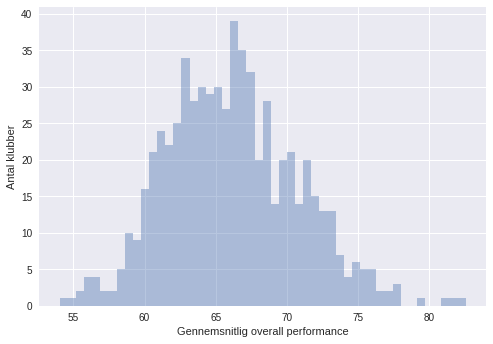

Træningsæt størrelse: 1272


In [2]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

### Opgave 0: Hvorfor giver det mening at bruge clustering?
Diskutere med andre, i 5 min, om hvorfor det kan være en god idé, at bruge clustering til at vise spillerpositioner. Hvilken viden kan vi få ud af det? Kan der være problemer med denne analyse og hvorfor?
Kom gerne med eksempler på om vi kan overføre denne tankegang til det virkelige verden.

__Vi tager en kort gennemgang af denne opgave, inden vi forsætter med resten.__

### Opgave 1: Find vores feature kolonner.

Som data scientist er det uundgåeligt, ikke at skulle få beskidte fingre og arbejde med noget kode.
I denne øvelse vil vi bruge nogle af Python's funktioner til finde hhv. det indeks hvor de fysiske attributter starter og slutter.
*Bare rolig: Hvis alt andet fejler, kan vi også tælle os frem til løsningen :-)*


__Lidt om Pandas dataframes__

Et pandas dataframe har en attribut som indeholder en liste af kolonner. Man tilgår attributten som på mange andre kodesprog ved at bruge punktum efter objektes navn fx.
    x.attribut.

1. Først skal to fysiske egenskaber findes; heldigvis ligger alle de fysiske egenskaber rækkefølge. Disse to markerer hhv. den første og den sidste kolonne, som indeholder fysiske egenskaber.

2. Vores næste opgave er at indeksere elementerne i den udtrukket liste. Der er mange veje til målet, dette er nok den [nemmeste](https://stackoverflow.com/questions/10777271/python-using-enumerate-inside-list-comprehension)
 
3. Nu skal resultatet fra den første og anden opgave kombineres. Udtræk indekset for hhv. start og slut kolonnen.


__Tip:__
Som i mange Objekt Orienteret Sporg findes der mange veje til målet. Dine bedste redskaber til at komme til målet er: Din sunde fornuft og [Google](https://www.google.dk)...

Hvert element i vores liste tager formen: (indeks, kolonne_med_første_fysisk_egenskab), hvis vi kalder et element i listen for *x*, kan indeks f.eks. tilgås ved x[0].
Et godt sted at starte er at bruge filter [*filter*](http://book.pythontips.com/en/latest/map_filter.html) metoden. 

In [3]:
# Vi bruger alle spillere i FIFAs katelog.
attribute_df = df.copy()
position_df = attribute_df[['Name','Preferred Positions', 'Age', 'Nationality']]

In [4]:
attribute_df = attribute_df.set_index(['Name']);
position_df = position_df.set_index('Name');

In [5]:
attribute_df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89.0,63.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154,92.0,48.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100,94.0,56.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291,88.0,78.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493,58.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
position_df.head()

,Preferred Positions,Age,Nationality
Name,,,
Cristiano Ronaldo,ST LW,32,Portugal
L. Messi,RW,30,Argentina
Neymar,LW,25,Brazil
L. Suárez,ST,30,Uruguay
M. Neuer,GK,31,Germany


In [7]:
enumareted_cols = list(enumerate(attribute_df.columns)) ###INDSÆT KODE

In [8]:
attribute_start_col = list(filter(lambda x: x[1]=='Acceleration', enumareted_cols))[0][0] ###INDSÆT KODE
print(attribute_start_col)

8


In [9]:
attribute_end_col = list(filter(lambda x: x[1]=='Volleys',enumareted_cols))[0][0] ###INDSÆT KODE
print(attribute_end_col)

41


In [10]:
# Vi ordner resten for dig.
attribute_col = list(range(attribute_start_col, attribute_end_col+1, 1))

In [11]:
attribute_df = attribute_df.iloc[:,attribute_col]

#### Bekræft at vi har kolonnerne med

In [12]:
print((list(attribute_df.columns))) ###INDSÆT KODE TIL AT BEKRÆFTE

['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']


In [13]:
attribute_df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
L. Messi,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
Neymar,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
L. Suárez,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
M. Neuer,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


#### Indledende statistik
For bedre at kunne forstå vores datasæt, giver det god menning at danne sig et overblik over data. Dette gøres ved *describe()* metoden, som laver opsummerende statistik på alle numeriske kolonner.

In [14]:
attribute_df.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,...,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,...,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


### Opgave 1 forsat:
Brug 5 minutter på at diskutere hvad denne statistik betyder. Kan vi få noget vigtigt ud af denne tabel?

#### Fortrukne positioner
I vores datasæt findes der også fortrukne positioner. Dem har vi trukket ud til *postition_df*, som vises under denne celle.

In [15]:
position_df.loc[:,'position_list'] = np.array(position_df['Preferred Positions'].str.split(' ').tolist())

In [16]:
position_df.head()

,Preferred Positions,Age,Nationality,position_list
Name,,,,
Cristiano Ronaldo,ST LW,32,Portugal,"[ST, LW, ]"
L. Messi,RW,30,Argentina,"[RW, ]"
Neymar,LW,25,Brazil,"[LW, ]"
L. Suárez,ST,30,Uruguay,"[ST, ]"
M. Neuer,GK,31,Germany,"[GK, ]"


###  Opgave 2: Første kørsel med KMeans

Da alt databearbejdningen fandt sted i sidste uge, er der blot tilbage, at kører den egentlig analyse. Til dette har vi [KMeans](https://en.wikipedia.org/wiki/K-means_clustering). 
Denne algoritme bruger et afstandsmål som reference til at skabe grupperinger. Ud fra afstandsmålne kan vi skabe nogle cluster centre, *centriods*. 

- Din første opgave er at køre KMeans. Vælg et passende antal cluster, grupper, du synes kunne være relevant, som data skal deles i - man må gerne diskutere med andre om valg af antal clustre.

Inden vi kommer så vidt, er vi nødt til at omforme positionerne således de kan sammenlignes med det resultat vi får fra vores Kmeans-algoritme.

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import cdist
mlb = MultiLabelBinarizer()
labels = mlb.fit(position_df['position_list'])

In [18]:
real_position_list = [i for i in labels.classes_ if i != '']
position_df[labels.classes_] = pd.DataFrame(labels.transform(position_df['position_list']), index=position_df.index, columns=labels.classes_)
del position_df['']
del position_df['position_list']
position_df.head()

,Preferred Positions,Age,Nationality,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
Name,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,ST LW,32,Portugal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
L. Messi,RW,30,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Neymar,LW,25,Brazil,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
L. Suárez,ST,30,Uruguay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
M. Neuer,GK,31,Germany,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Kør selve KMeans

In [174]:
def run_kmeans(attributes, lables, k = 20):
    kmeans = cluster.KMeans(n_clusters= k, random_state= True)
    model = kmeans.fit(attributes)
    lables['prediction'] = model.predict(attributes)
    
    # Vi indsætter centerpunkterne i en midlertidig dataframe Z
    Z = pd.DataFrame(model.cluster_centers_[lables['prediction']], columns=attributes.columns)
    
    #Beregner afstand
    lables['distance'] = np.linalg.norm(attributes.as_matrix()-Z.as_matrix(),axis=1)
    return lables

n_clusters = None### INDSÆT ANTAL CLUSTRE
position_df = run_kmeans(attribute_df, position_df, 20)

In [175]:
position_df.head()

,Preferred Positions,Age,Nationality,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,prediction,distance
Name,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,ST LW,32,Portugal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,15,95.662933
L. Messi,RW,30,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15,84.104280
Neymar,LW,25,Brazil,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,64.245183
L. Suárez,ST,30,Uruguay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,90.485767
M. Neuer,GK,31,Germany,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,98.900090


In [170]:
def print_cluster_til_position(df, columns, **kwargs):
    
    size = kwargs.get('figsize',(20,10))
    
    grouped_by_position_df = df.groupby('prediction', as_index=True)[columns].sum()
    f, ax = plt.subplots(1,1,figsize=size)
    sb.set(style="ticks")
    sb.heatmap(grouped_by_position_df, annot=True, fmt="d", linewidths=1., ax=ax)
    plt.show()

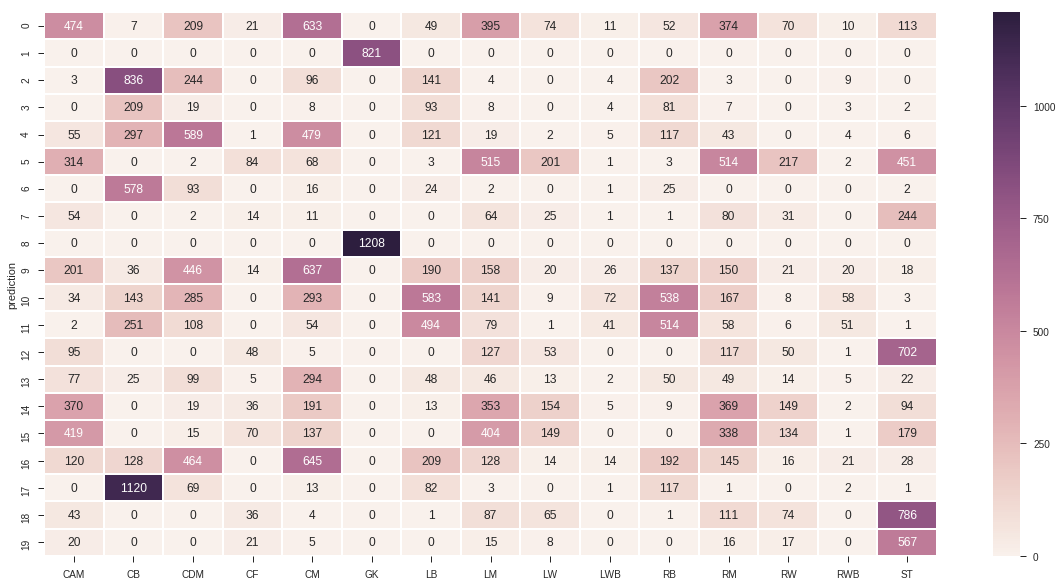

In [171]:
print_cluster_til_position(position_df,real_position_list)

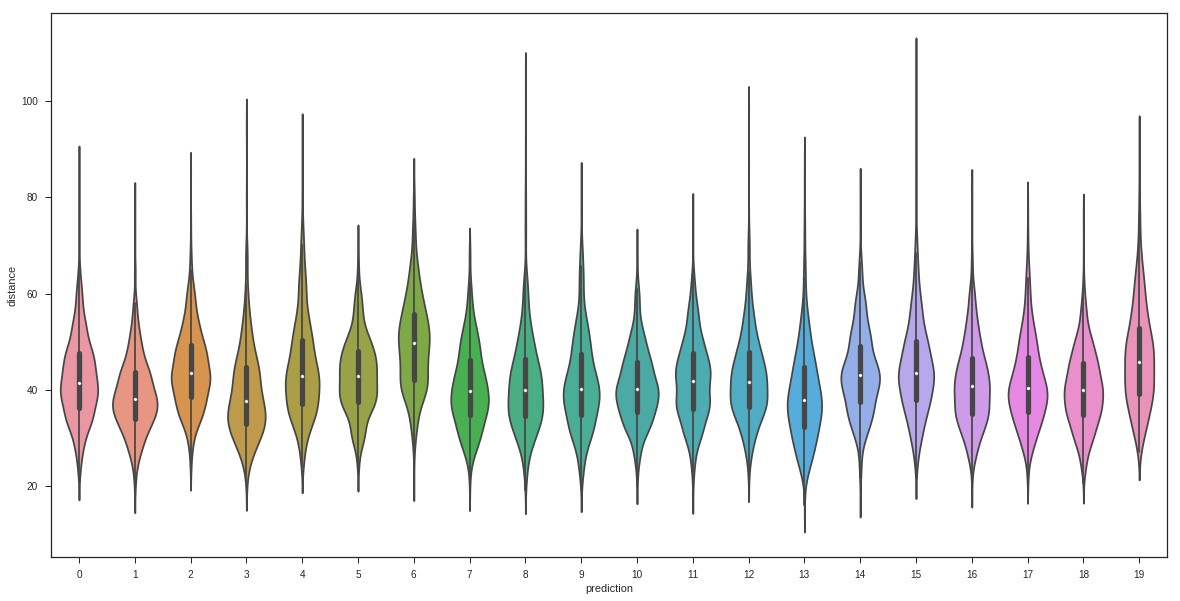

In [172]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
sb.violinplot(x='prediction', y='distance', data=position_df, orient='v',ax=ax)
plt.show()

Ovenstående figurer viser hhv. fordelingen mellem hvad KMeans grupperet spillerne som (predictions opad y-aksen), i forhold til deres fortrukne spiller (positioner ud af x-aksen), den øverste. Den nederste figur viser fordelingen af afstande for hvert cluster. Der hvor hver "violin" buler ud viser hvor den største koncentration af punkter ligger.

__Her er et billedet over positionerne. Diskutere hvad tallene i tabellen betyder. Giver dette resultat mening?__
<img src="https://www.fifauteam.com/wp-content/uploads/2015/10/A768-1.jpg"
         align="center"
         width="100%">
         
         
### Opgave 3: 
Første forsøg med at køre KMeans var ikke så sucessfuldt som håbet. 
Nogle af de fejlkilder som er i eksemplet er at flere spillere har mange fortrukne positioner; mange af disse positioner er tæt på hinanden f.eks. LWB og LB.

Generelt ses det vi har variationer i positioner med 3-bogstavskombinationer, dette kunne vi også rette op på.
En anden fejlkilde er at vi tager rådata ind. Dette kan ødelægge vores analyse, ved f.eks. at indfører gigantiske afstande i visse clustre. Normalt fortages der en [standardisering](https://en.wikipedia.org/wiki/Feature_scaling) af ens data. 

In [38]:
from sklearn.preprocessing import scale

### 3.1 Omdan positionskoder
Denne opgave er lidt banal, men brug den logisk operator som gør at vi kan sætte to kolonner sammen. Du har følgende valgmuligheder: *and: & og or: |* 

In [39]:
simplied_position_df =  position_df.copy()
del simplied_position_df['prediction']
# Samler CAM og CDM til CM
simplied_position_df['CM'] = (simplied_position_df['CAM'] | # INDSÆT BINÆR OPERATOR
                              simplied_position_df['CM'] | # INDSÆT BINÆR OPERATOR
                              simplied_position_df['CDM']
                             )
del simplied_position_df['CAM']
del simplied_position_df['CDM']

simplied_position_df['RB'] = (simplied_position_df['RB'] | # INDSÆT BINÆR OPERATOR
                              simplied_position_df['RWB'])
simplied_position_df['LB'] = (simplied_position_df['LB'] | # INDSÆT BINÆR OPERATOR
                              simplied_position_df['LWB'])
del simplied_position_df['RWB']
del simplied_position_df['LWB']

simplied_position_df.head()

,Preferred Positions,Age,Nationality,CB,CF,CM,GK,LB,LM,LW,RB,RM,RW,ST,distance
Name,,,,,,,,,,,,,,,
Cristiano Ronaldo,ST LW,32,Portugal,0,0,0,0,0,0,1,0,0,0,1,95.662933
L. Messi,RW,30,Argentina,0,0,0,0,0,0,0,0,0,1,0,84.104280
Neymar,LW,25,Brazil,0,0,0,0,0,0,1,0,0,0,0,64.245183
L. Suárez,ST,30,Uruguay,0,0,0,0,0,0,0,0,0,0,1,90.485767
M. Neuer,GK,31,Germany,0,0,0,1,0,0,0,0,0,0,0,98.900090


Det ses nu at vi har kun 2-bogstavskoder, og derved har vi simplificeret vores problem meget.

### Skalering af data
Det næste vi kan gøre er at skalere vores træningssæt for at uligne store afstande i mellem datapunkter.

In [40]:
attribute_df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
L. Messi,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
Neymar,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
L. Suárez,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
M. Neuer,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


In [41]:
scaled_attributes_df = pd.DataFrame(
    scale(attribute_df),
    columns=attribute_df.columns,
    index=attribute_df.index
)
scaled_attributes_df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,1.907976,1.824837,1.892122,2.500640,...,3.717432,1.655064,2.203633,-1.050640,1.787786,1.804927,-0.753235,1.165776,2.222647,2.524572
L. Messi,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,1.474575,2.258186,2.208066,2.551988,...,3.608400,1.990137,1.686334,-0.911002,1.514505,0.611645,-0.890636,-0.498640,2.570182,2.355411
Neymar,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,1.366224,1.824837,2.155409,2.243903,...,2.845183,1.521035,1.398946,-0.585180,1.719465,0.925666,-1.073838,-0.974188,1.875113,2.242637
L. Suárez,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,1.474575,2.095680,1.628836,2.500640,...,3.390338,1.655064,1.801289,-0.352449,0.831304,1.616514,-0.112029,1.165776,2.153140,2.524572
M. Neuer,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,-1.884289,-1.804469,-1.319973,-1.658496,...,2.518090,-0.221345,-1.762323,-1.609193,-0.261817,-1.209681,-1.715044,1.403550,1.180044,-1.817236


For at teste om gennemsnittet er 0 og standardafvigelsen er 1.0

In [42]:
scaled_attributes_df.describe()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,17981.000000,1.798100e+04,...,1.798100e+04,17981.000000,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04
mean,1.643878e-16,1.264522e-17,2.402592e-16,-2.434205e-16,8.851653e-17,-2.529044e-17,-3.793566e-17,2.529044e-17,0.000000,6.322609e-17,...,-1.264522e-16,0.000000,-1.896783e-16,-1.138070e-16,-1.327748e-16,-2.529044e-17,6.954870e-17,-1.770331e-16,-2.023235e-16,-3.793566e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028,1.000028e+00,...,1.000028e+00,1.000028,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-3.595752e+00,-2.565971e+00,-3.335987e+00,-3.747381e+00,-2.982966e+00,-4.092037e+00,-2.426041e+00,-2.237819e+00,-2.794377,-2.223317e+00,...,-3.696682e+00,-3.237001,-3.026831e+00,-1.935016e+00,-3.677821e+00,-3.219420e+00,-1.989847e+00,-4.223764e+00,-2.990370e+00,-2.211945e+00
25%,-5.769630e-01,-7.340446e-01,-5.640217e-01,-5.545293e-01,-3.041813e-01,-5.334787e-01,-6.382588e-01,-7.210940e-01,-0.372142,-8.369383e-01,...,-7.528426e-01,-0.355374,-5.552931e-01,-1.004094e+00,-5.350974e-01,-4.560292e-01,-9.822371e-01,-5.778984e-01,-6.966422e-01,-7.458804e-01
50%,1.609633e-01,1.819185e-01,1.120674e-01,1.549933e-01,2.911043e-01,1.627610e-01,2.285446e-01,3.726831e-02,0.312403,1.386616e-01,...,1.037496e-02,0.247758,1.919160e-01,2.991959e-01,1.481035e-01,1.720143e-01,3.001748e-01,5.616510e-02,1.374405e-01,4.353922e-02
75%,6.976370e-01,7.543954e-01,7.205476e-01,7.226113e-01,6.482756e-01,7.042807e-01,7.702968e-01,7.956306e-01,0.681004,8.061773e-01,...,6.645614e-01,0.649845,7.666922e-01,8.577489e-01,6.946642e-01,6.744490e-01,8.497799e-01,6.902286e-01,7.630025e-01,7.765717e-01
max,2.106405e+00,2.300083e+00,2.207944e+00,2.283561e+00,2.196018e+00,2.947720e+00,2.233028e+00,2.420693e+00,2.208066,2.551988e+00,...,3.717432e+00,2.258195,2.203633e+00,2.114493e+00,2.129386e+00,1.993340e+00,2.040591e+00,2.592419e+00,2.848209e+00,2.693734e+00


### Opgave 3.2: Hyperparameter optimering - Elbow method
<img src='albue.jpg'
     align='center'
     height=20%>


Den forrige analyse var ikke særlig tilfredsstillende - Vi havde ingen idé hvilket antal clusters vi skulle bruge. 

Som data scientist har vi nogle værktøjer, som vi kan bruge til at træffe en beslutning på et mere oplysende grundlag.  
Den mest intuitive metode er at undersøge hvor god Kmeans er til at cluster data. KMeans outputter, foruden grupperingerne, også et mål for hvor god modellen er. Kmeans basere dette mål på kvadreret afstand fra alle datapunkter til deres respektive cluster-centrum. 
Dvs. detso lavere en værdi, desto tættere ligger datapunkterne på centrum, og derved er modellen mere forklarende. 

Ved at køre flere KMeans, med forskellig antal clusters kan man få et billedet af hvor god modellen, udvikler sig. Det man som data scientist gør, er at kigge efter et knæk i grafen, eller den såkaldte albue, hvor en øgelse af antal cluster ikke påvirker målet i så høj grad.

__Undersøg nedenstående graf, og diskutere hvilket antal af cluster I ville bruge i den nye analyse. __
__ Giver det mere menning nu?__

In [52]:
iterations = 100
r = range(5, iterations+5, 5)
km = [cluster.KMeans(n_clusters=i) for i in r]
score = [i.fit(scaled_attributes_df).score(scaled_attributes_df) for i in km]

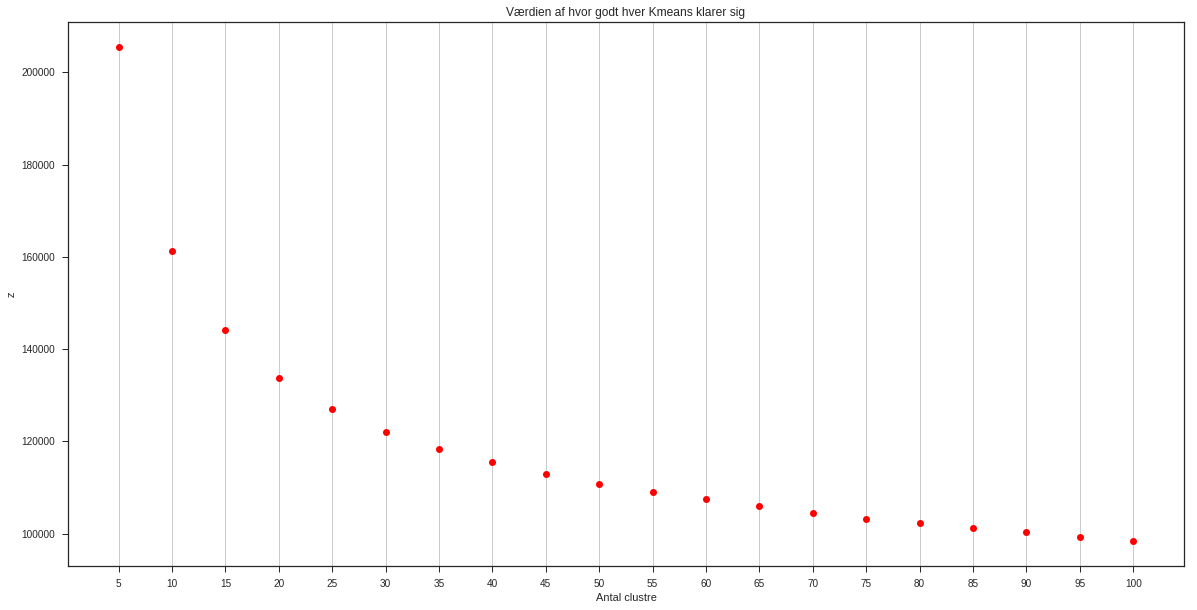

In [136]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.grid(True, axis='x')
plt.plot(np.array(r),-1*np.array(score),'ro')
plt.xticks(range(5,iterations+5, 5))
plt.xlabel('Antal clustre')
plt.ylabel('z')
plt.title('Værdien af hvor godt hver Kmeans klarer sig')
plt.show()

Den nye analyse med det rettede antal clustre. 

In [176]:
n_clusters = None### INDSÆT ANTAL CLUSTRE
simplied_position_df = run_kmeans(scaled_attributes_df, simplied_position_df, 20)
simplied_position_df

,Preferred Positions,Age,Nationality,CB,CF,CM,GK,LB,LM,LW,RB,RM,RW,ST,distance,prediction
Name,,,,,,,,,,,,,,,,
Cristiano Ronaldo,ST LW,32,Portugal,0,0,0,0,0,0,1,0,0,0,1,6.186708,16
L. Messi,RW,30,Argentina,0,0,0,0,0,0,0,0,0,1,0,5.140744,16
Neymar,LW,25,Brazil,0,0,0,0,0,0,1,0,0,0,0,3.796245,16
L. Suárez,ST,30,Uruguay,0,0,0,0,0,0,0,0,0,0,1,5.517014,16
M. Neuer,GK,31,Germany,0,0,0,1,0,0,0,0,0,0,0,6.411769,5
R. Lewandowski,ST,28,Poland,0,0,0,0,0,0,0,0,0,0,1,4.953655,16
De Gea,GK,26,Spain,0,0,0,1,0,0,0,0,0,0,0,5.347429,5
E. Hazard,LW,26,Belgium,0,0,0,0,0,0,1,0,0,0,0,3.571087,16
T. Kroos,CDM CM,27,Germany,0,0,1,0,0,0,0,0,0,0,0,5.284036,1


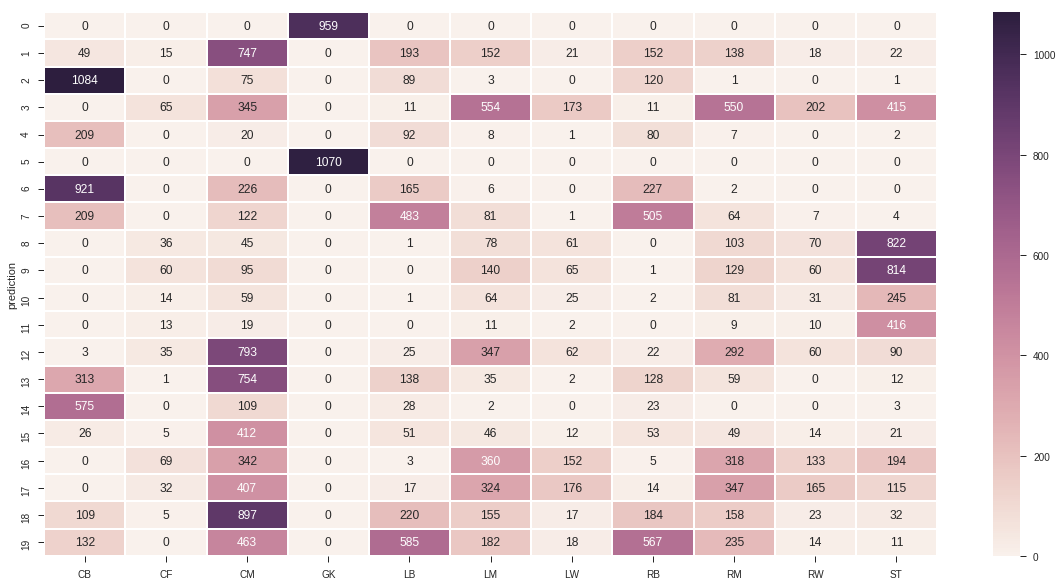

In [152]:
positions_list = "CB CF CM GK LB LM LW RB RM RW ST".split(' ')
print_cluster_til_position(simplied_position_df, positions_list)

__Giver dit nye resultat mere menning? Hvordan fordeler de sig?__

### Entropi 
Som en lidt mere advanceret metode til at validere om ens model gør det godt, kan vi bruge entropi.

Entropi stammer fra fysik og beskriver mængden af uorden i Universet. Når entropien er 0 vil Universet være perfekt ordnet, omvendt når vi har total kaos vil entropien være meget høj. Entropi bruges også i andre områder, heriblandt Machine Leraning. 

Vi kan bruge dette begreb i vores cluster analyse. Antag at hvert cluster er et 'univers', og det perfekte univers indeholder kun elementer som er ens, dvs. én spillertype pr. cluster. 
Mere realistisk, men stadig ideelt, vil vores cluster bestå af en hoved spillertype, med nogle få outliers, i form af andre spillertype. Det vi ønsker er at finde det antal cluster som giver den laveste entropi. 
__Kør nedenstående celler. Giver analysen med entropi det samme som med elbow-metoden, diskutere?__

In [143]:
def get_best_model(attributes, lables, max_k = 100):
    positions_list = "CB CF CM GK LB LM LW RB RM RW ST".split(' ')
    all_players = lables[positions_list].sum().sum()
    resultater = []
    
    def entropi(pdf):
        n = pdf.sum(axis=1) # rækkevis summering
        return pdf.apply(lambda x: -x/n*np.log(x/n)).sum(axis=1, skipna=True)
    
    for i in range(5, max_k, 5):
        km = cluster.KMeans(n_clusters=i, random_state= True)
        lables['prediction'] = km.fit_predict(attributes)
        grouped_df = lables.groupby(
            'prediction', as_index=True)[positions_list].sum()
        
        weighted_sum_of_squared_entropi = (grouped_df.sum(axis=1)*entropi(grouped_df)).sum()/all_players
        print('Antal cluster: {}, entropi: {}'.format(i, weighted_sum_of_squared_entropi))
        resultater.append((i,weighted_sum_of_squared_entropi))
    return resultater

In [144]:
entropi = get_best_model(scaled_attributes_df,simplied_position_df)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Antal cluster: 5, entropi: 1.5519705042493783
Antal cluster: 10, entropi: 1.451122574590434
Antal cluster: 15, entropi: 1.4068041864331207
Antal cluster: 20, entropi: 1.3719947543488684
Antal cluster: 25, entropi: 1.3627905224763956
Antal cluster: 30, entropi: 1.3486141111702148
Antal cluster: 35, entropi: 1.3461306025506001
Antal cluster: 40, entropi: 1.3369016305945414
Antal cluster: 45, entropi: 1.327911675974951
Antal cluster: 50, entropi: 1.3226283073350107
Antal cluster: 55, entropi: 1.3227697892138333
Antal cluster: 60, entropi: 1.307477508532054
Antal cluster: 65, entropi: 1.3076202512354047
Antal cluster: 70, entropi: 1.3025720460617791
Antal cluster: 75, entropi: 1.3019455959028938
Antal cluster: 80, entropi: 1.3010221913628655
Antal cluster: 85, entropi: 1.294790444573672
Antal cluster: 90, entropi: 1.2947152692349926
Antal cluster: 95, entropi: 1.2926102261649643


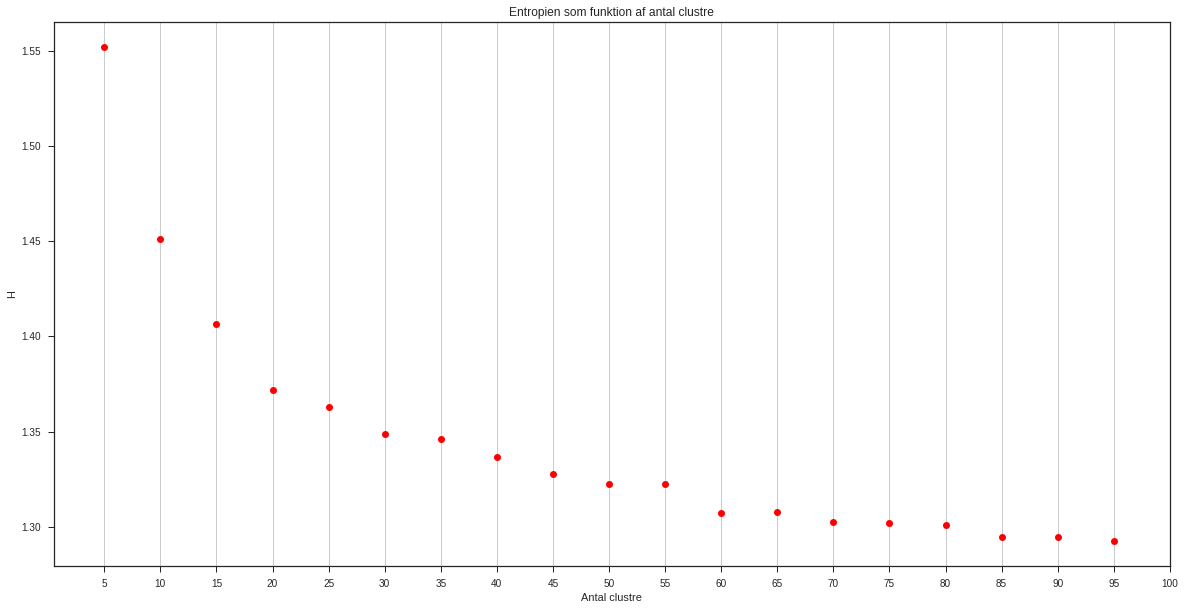

In [147]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.grid(True, axis='x')
plt.plot(list(map(lambda x: x[0],entropi)),list(map(lambda x: x[1],entropi)),'ro')
plt.xticks(range(5,iterations+5, 5))
plt.xlabel('Antal clustre')
plt.ylabel('H')
plt.title('Entropien som funktion af antal clustre')
plt.show()

### Vi kører modellen igen igen

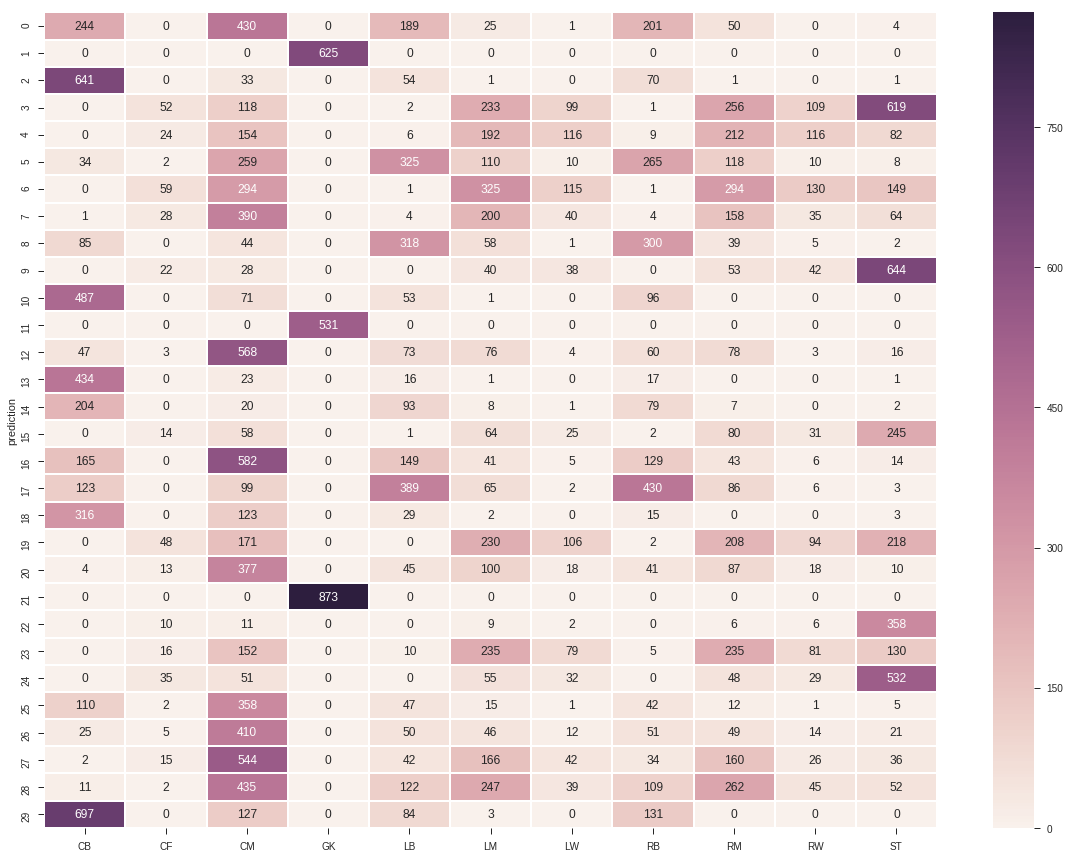

In [177]:
n_clusters = None### INDSÆT ANTAL CLUSTRE
entropi_position_df = run_kmeans(scaled_attributes_df, simplied_position_df, 30)

print_cluster_til_position(entropi_position_df, positions_list, figsize=(20,15))

### Sidste opgave: Outliers i clustre

Som en sidste analyse kan vi udtage et eller to clustre og se hvordan afstanden, fra datapunkt til centrum, forholder sig i clusteret. 

__Udvælg et cluster, som har en høj entropi, dvs. der er mange forskellige spillertyper i clusteret, og undersøg hvordan afstanden forholder sig, brug nedenstående celle til at visualiser afstanden__

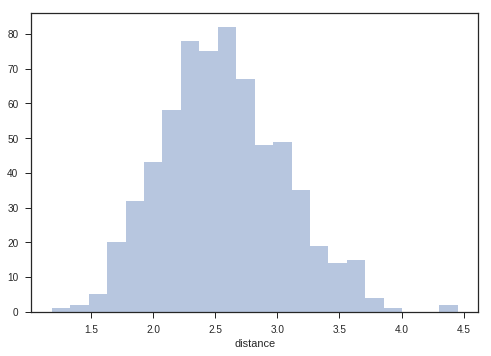

In [179]:
n_cluster = None #INDSÆT ET CLUSTERTAL HER
entropi_position_df[entropi_position_df['prediction'] == 6]['distance']

sb.distplot(entropi_position_df[entropi_position_df['prediction'] == 6]['distance'], kde=False)
plt.show()

__Udtræk den eller de spillere som I mener, baseret på histogrammet, skulle være en outlier. Hvem er det?__

In [190]:
distance_boundary = None #INDSÆT ET AFSTANDSMÅL HER

outliers = entropi_position_df[(entropi_position_df['prediction'] == 6) &
                               (entropi_position_df['distance'] > 4.0)]

display(attribute_df[attribute_df.index.isin(outliers.index) ])
display(outliers)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Name,,,,,,,,,,,,,,,,,,,,,
David Ferreiro,90.0,74.0,87.0,91.0,69.0,63.0,71.0,81.0,70.0,68.0,...,71.0,65.0,67.0,36.0,90.0,32.0,23.0,32.0,62.0,46.0
E. Oztumer,88.0,65.0,93.0,96.0,70.0,76.0,58.0,70.0,69.0,63.0,...,59.0,68.0,68.0,17.0,70.0,76.0,22.0,25.0,69.0,63.0


,Preferred Positions,Age,Nationality,CB,CF,CM,GK,LB,LM,LW,RB,RM,RW,ST,distance,prediction
Name,,,,,,,,,,,,,,,,
David Ferreiro,RM LM,29,Spain,0,0,0,0,0,1,0,0,1,0,0,4.449922,6
E. Oztumer,CF CAM,26,England,0,1,1,0,0,0,0,0,0,0,0,4.435893,6


<img src='tenor.gif'
     width=60%>
     
# Tillykke du har nu gennemført Teknisk Tirsdag omkring Machine Learning. 
### I løbet af disse to gange har vi gennemgået
* Motivationen bag machine learning
* Arbejdet med forskellige data cleaning methoder, herunder: konvertering af tekst til tal og fjernelse af unyttige kolonner. 
* Supervised Learning, 
* Unsupervised Learning, 